In [ ]:
pip install --upgrade typing_extensions


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda update typing_extensions


Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\DELL\anaconda3

  added / updated specs:
    - typing_extensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aiobotocore-2.19.0         |  py311haa95532_0         159 KB
    aiohappyeyeballs-2.4.4     |  py311haa95532_0          28 KB
    aiohttp-3.11.10            |  py311h827c3e9_0         907 KB
    alabaster-0.7.16           |  py311haa95532_0          20 KB
    anyio-4.6.2                |  py311haa95532_0         253 KB
    argon2-cffi-bindings-21.2.0|  py311h827c3e9_1          41 KB
    arrow-1.3.0                |  py311haa95532_0         187 KB
    arrow-cpp-19.0.0           |       h33d5241_2         7.7 MB
    astropy-7.0.0              |  py311h827c3e9_0        13.1 MB
    astropy-iers-data-0.2025.1.13.0.34.51| 



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.3.1


CRITICAL concurrent.futures:_worker(109): Exception in worker
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\Lib\site-packages\conda\core\path_actions.py", line 1391, in execute
    raw_index_json = read_index_json(self.target_full_path)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\conda\gateways\disk\read.py", line 130, in read_index_json
    with open(join(extracted_package_directory, "info", "index.json")) as fi:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL\anaconda3\Lib\site-packages\conda\common\compat.py", line 71, in open
    return io_open(
           ^^^^^^^^
FileN

In [ ]:

pip install --upgrade typing-extensions


  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/8b/54/b1ae86c0973cc6f0210b53d508ca3641fb6d0c56823f288d108bc7ab3cc8/typing_extensions-4.13.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade torch torchvision torchaudio


  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/88/53/4ad334b9b1d8dd99836869fec139cb74a27781298360b91b9506c53f1d10/torchvision-0.21.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/1f/31/417d6955585be76842e9b0159d3801c0b5f9a4ea0db39db1a72bc262c861/torchaudio-2.6.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
    --------------------------------------- 0.0/1.6 MB 660.6 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.6 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.6 MB 2.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.6 MB 3.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.6 MB 3.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.6 MB 2.0 MB/s eta 0:00:01
   ----------------- --------------------

In [ ]:
!conda info --envs

# conda environments:
#
base                  *  C:\Users\DELL\anaconda3



In [ ]:
!conda create -n pytorch_env python=3.8 pytorch torchvision torchaudio ipykernel -c pytorch

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3

  added / updated specs:
    - ipykernel


The following packages will be UPDATED:

  ca-certificates                     2023.12.12-haa95532_0 --> 2025.2.25-haa95532_0 
  certifi                        2023.11.17-py311haa95532_0 --> 2025.1.31-py311haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.3.1




^C


In [ ]:
!conda run -n pytorch_env python -m ipykernel install --user --name pytorch_env --display-name "Python 3.8 (PyTorch)"


EnvironmentLocationNotFound: Not a conda environment: C:\Users\DELL\anaconda3\envs\pytorch_env



In [1]:
import pandas as pd
import numpy as np
import geopy.distance
from sko.PSO import PSO
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
from collections import defaultdict


spreadsheet = pd.read_csv(r'C:\Users\DELL\ACD_LAB\NYC_Wi-Fi_Hotspot_Locations_20250211.csv')
df = spreadsheet[['Latitude', 'Longitude']].dropna()
coordinates = df.to_numpy()

In [2]:
# ============================
# 2. Fog Node Placement
# ============================
def kmeans_fog_placement(data, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10).fit(data)
    return kmeans.cluster_centers_

num_fog_nodes = 10
fog_nodes_kmeans = kmeans_fog_placement(coordinates, num_fog_nodes)


def fast_distance_matrix(coords1, coords2):
    return cdist(coords1, coords2, metric='euclidean')


def adaptive_pso_objective_function(fog_nodes, num_fog_nodes):
    fog_nodes = fog_nodes.reshape((num_fog_nodes, 2))
    dist_mat = fast_distance_matrix(coordinates, fog_nodes)
    min_distances = np.min(dist_mat, axis=1)
    penalty_weight = 0.05 * num_fog_nodes
    return np.mean(min_distances) + penalty_weight


def find_min_fog_nodes():
    best_num_nodes = 5
    best_cost = float('inf')
    for n in range(5, 21):
        pso = PSO(func=lambda x: adaptive_pso_objective_function(x, n), dim=n * 2, pop=50, max_iter=100,
                  lb=[min(df['Latitude']), min(df['Longitude'])] * n,
                  ub=[max(df['Latitude']), max(df['Longitude'])] * n)
        pso.run()
        if pso.gbest_y < best_cost:
            best_cost = pso.gbest_y
            best_num_nodes = n
    return best_num_nodes

num_fog_nodes_pso = find_min_fog_nodes()


pso = PSO(func=lambda x: adaptive_pso_objective_function(x, num_fog_nodes_pso), dim=num_fog_nodes_pso * 2, pop=50, max_iter=100,
          lb=[min(df['Latitude']), min(df['Longitude'])] * num_fog_nodes_pso,
          ub=[max(df['Latitude']), max(df['Longitude'])] * num_fog_nodes_pso)
pso.run()
opt_fog_nodes = pso.gbest_x.reshape((num_fog_nodes_pso, 2))


In [4]:
# ============================
# 3. Federated Learning Setup
# ============================
class FLRModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()  # Proper initialization of parent class
        self.fc = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.fc(x)

def train_flr_model(data, labels, model, epochs=100):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(torch.tensor(data, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(labels, dtype=torch.float32).view(-1, 1))
        loss.backward()
        optimizer.step()
    return model

def federated_learning_on_clusters(fog_nodes, data, labels):
    cluster_assignments = KMeans(n_clusters=len(fog_nodes), random_state=42).fit_predict(data)
    models = []
    for i in range(len(fog_nodes)):
        cluster_data = data[cluster_assignments == i]
        cluster_labels = labels[cluster_assignments == i]
        model = FLRModel(2, 1)
        model = train_flr_model(cluster_data, cluster_labels, model)
        models.append(model.state_dict())
    avg_model = FLRModel(2, 1).state_dict()
    for key in avg_model:
        avg_model[key] = torch.stack([m[key] for m in models], 0).mean(0)
    return avg_model

In [5]:

STORAGE_COST_PER_GB = 0.15
EGRESS_COST_PER_GB = 0.081
INGRESS_COST_PER_GB = 0.01
FOG_NODE_STORAGE_TB = 12
FOG_NODE_STORAGE_GB = FOG_NODE_STORAGE_TB * 1024
REPLICA_SIZE_MB = 200
REPLICA_SIZE_GB = REPLICA_SIZE_MB / 1024
UPDATE_FREQUENCY = 0.2

def compute_content_distribution_cost(fog_nodes, hotspots):
    dist_mat = cdist(hotspots, fog_nodes, metric='euclidean')
    min_distances = np.min(dist_mat, axis=1)
    distance_cost = np.sum(min_distances)
    num_replicas = int(FOG_NODE_STORAGE_GB / REPLICA_SIZE_GB)
    storage_cost = num_replicas * REPLICA_SIZE_GB * STORAGE_COST_PER_GB
    egress_cost = num_replicas * REPLICA_SIZE_GB * EGRESS_COST_PER_GB
    ingress_cost = num_replicas * REPLICA_SIZE_GB * INGRESS_COST_PER_GB * UPDATE_FREQUENCY
    total_cost = distance_cost + storage_cost + egress_cost + ingress_cost
    return total_cost

distribution_cost = compute_content_distribution_cost(opt_fog_nodes, coordinates)
print(f"Estimated Content Distribution Cost: ${distribution_cost:.2f}")

Estimated Content Distribution Cost: $2974.08


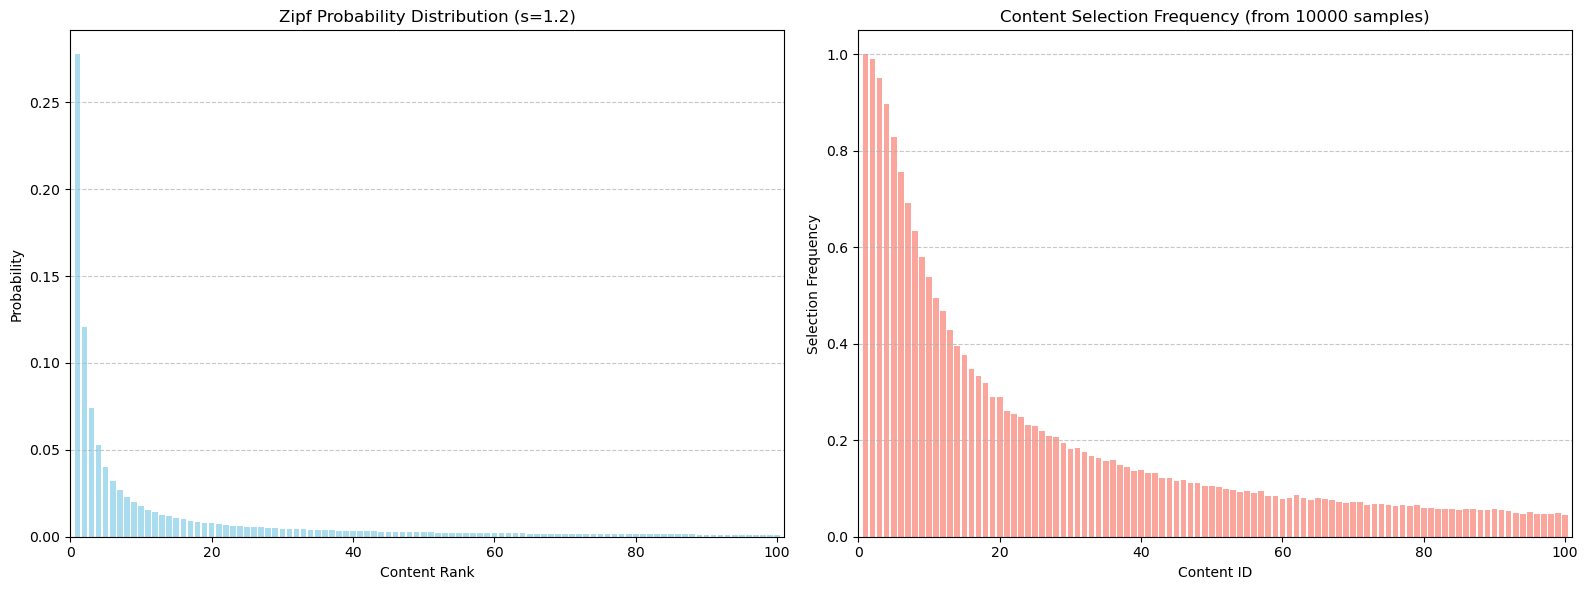

Selected content IDs: [1, 2, 3, 4, 5, 7, 9, 11, 18, 21, 23, 25, 38, 45, 48, 68, 71, 76, 87, 99]


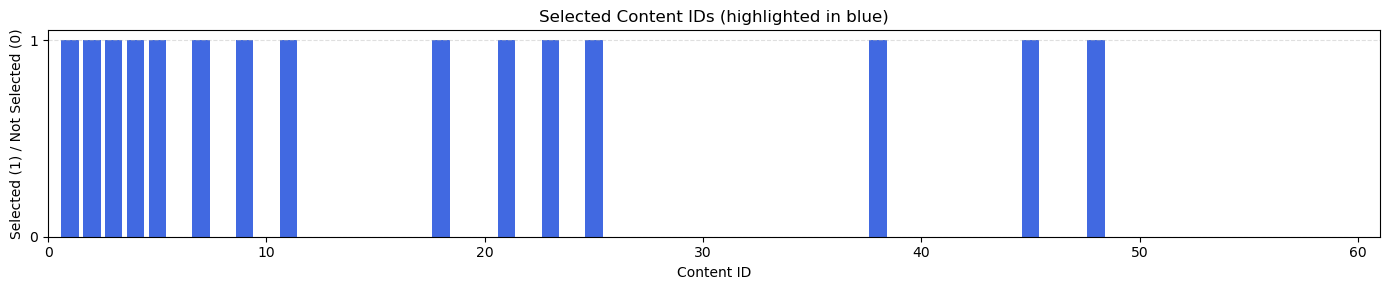

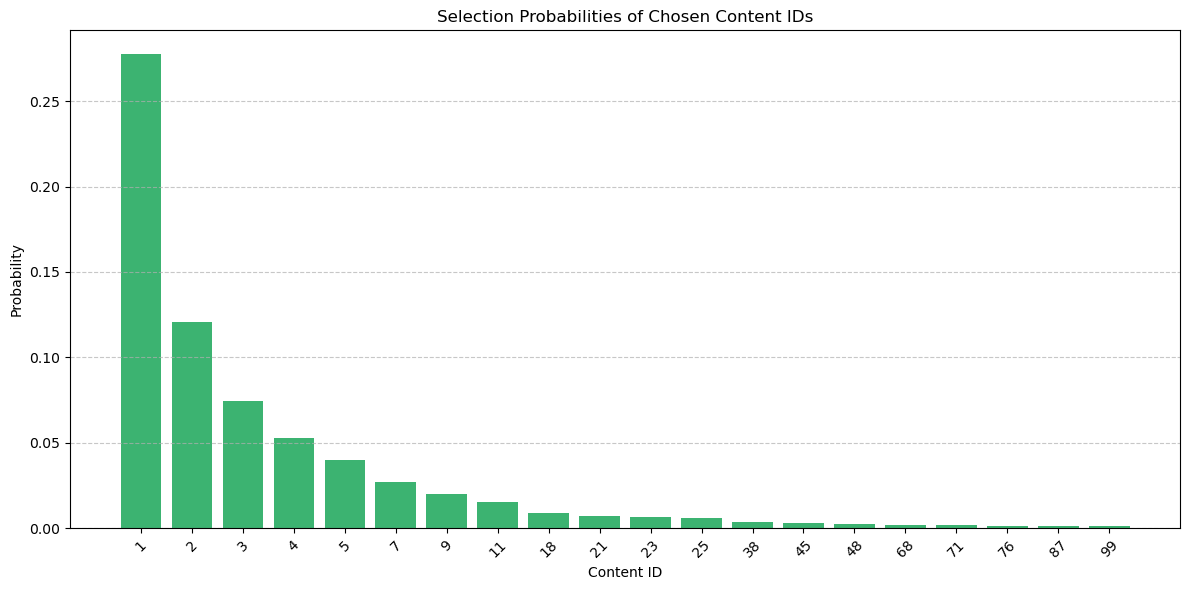

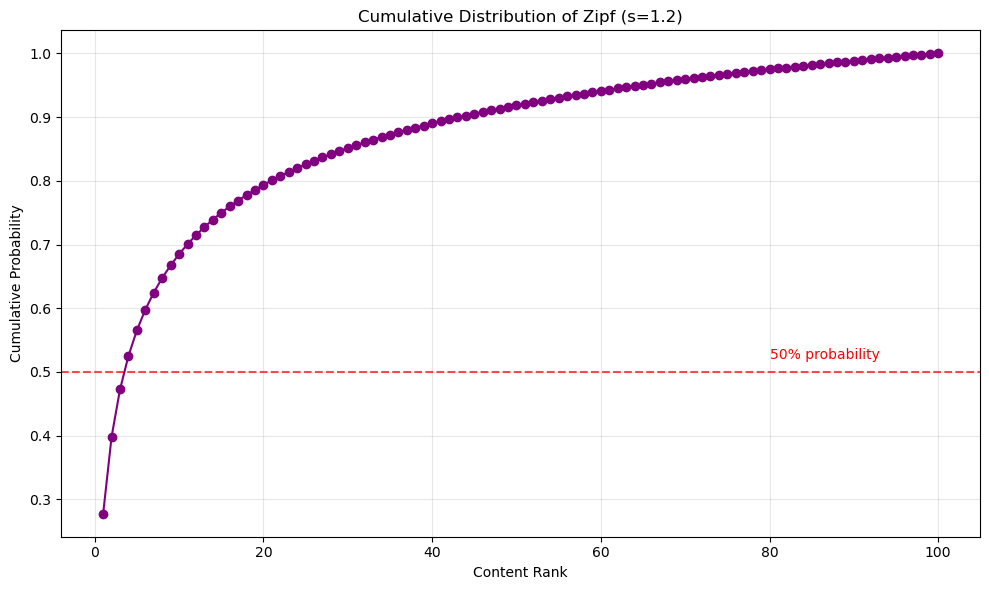

Generated content IDs with Zipf distribution: [21 20 13  6  1 76  9 48 83  5 17  2  3 37 34  4 25 12  8 23]
Episode 1: Total Reward = -2
Episode 2: Total Reward = 8
Episode 3: Total Reward = 8
Episode 4: Total Reward = -2
Episode 5: Total Reward = 18
Episode 6: Total Reward = 8
Episode 7: Total Reward = 10
Episode 8: Total Reward = -2
Episode 9: Total Reward = 2
Episode 10: Total Reward = 14
Episode 11: Total Reward = 2
Episode 12: Total Reward = 14
Episode 13: Total Reward = 16
Episode 14: Total Reward = 14
Episode 15: Total Reward = 0
Episode 16: Total Reward = 10
Episode 17: Total Reward = 2
Episode 18: Total Reward = 14
Episode 19: Total Reward = -2
Episode 20: Total Reward = 12
Episode 21: Total Reward = 2
Episode 22: Total Reward = 2
Episode 23: Total Reward = 16
Episode 24: Total Reward = 16
Episode 25: Total Reward = 18
Episode 26: Total Reward = 18
Episode 27: Total Reward = 16
Episode 28: Total Reward = 16
Episode 29: Total Reward = 18
Episode 30: Total Reward = 6
Episode 31:

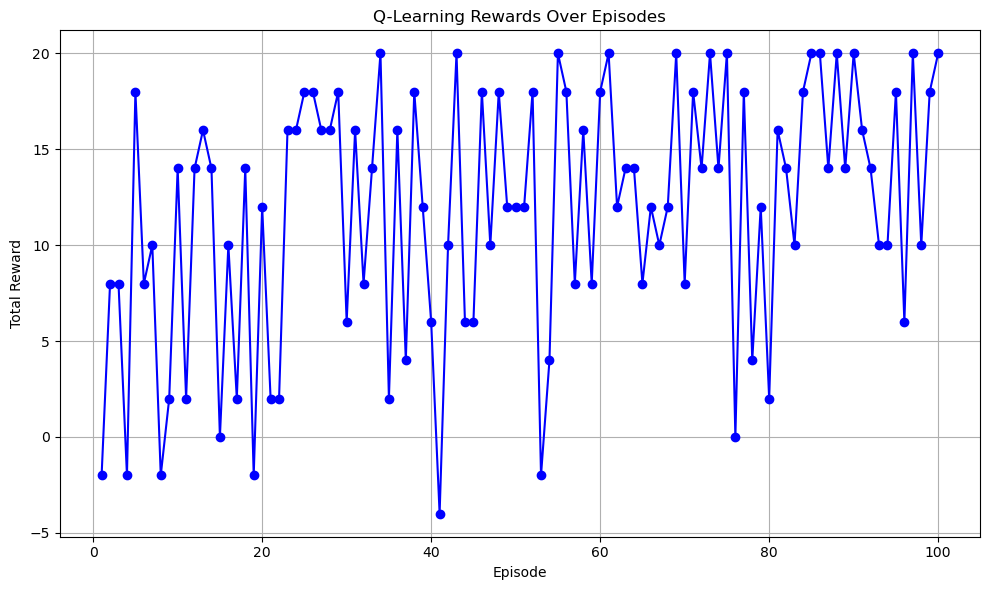

C:\Users\DELL\AppData\Local\Temp\ipykernel_10108\3488832532.py:235: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(step_idx, content_to_idx[action], color=color, marker=marker, s=100, edgecolors='black')


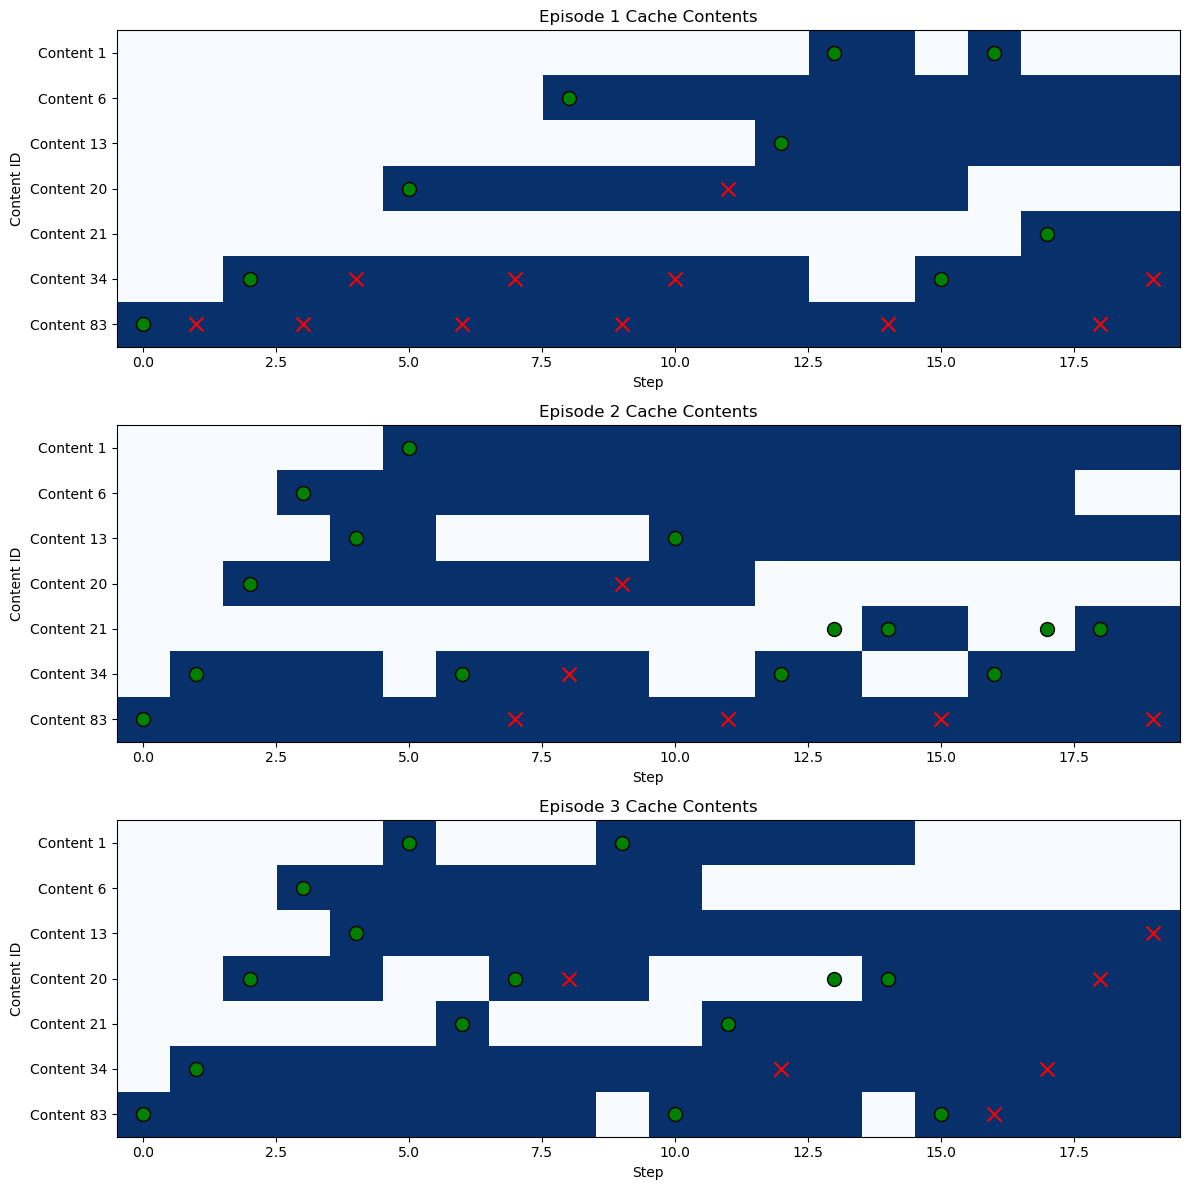

<Figure size 1000x800 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import defaultdict

def zipf_popularity(rank, s=1.2):
    return 1 / np.power(rank, s)


def cache_content():
    content_ranks = np.arange(1, 101)
    probabilities = zipf_popularity(content_ranks)
    probabilities /= probabilities.sum()
    return np.random.choice(content_ranks, size=20, replace=False, p=probabilities)



np.random.seed(42)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


content_ranks = np.arange(1, 101)
probabilities = zipf_popularity(content_ranks)
probabilities /= probabilities.sum()


ax1.bar(content_ranks, probabilities, color='skyblue', alpha=0.7)
ax1.set_title('Zipf Probability Distribution (s=1.2)')
ax1.set_xlabel('Content Rank')
ax1.set_ylabel('Probability')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.set_xlim(0, 101)


num_samples = 10000
selection_counts = np.zeros(100)

for _ in range(num_samples):
    selected = cache_content() - 1  
    for content_id in selected:
        selection_counts[int(content_id)] += 1


selection_frequency = selection_counts / num_samples


ax2.bar(content_ranks, selection_frequency, color='salmon', alpha=0.7)
ax2.set_title(f'Content Selection Frequency (from {num_samples} samples)')
ax2.set_xlabel('Content ID')
ax2.set_ylabel('Selection Frequency')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.set_xlim(0, 101)

plt.tight_layout()
plt.show()


selected_content = cache_content()
print(f"Selected content IDs: {sorted(selected_content)}")


plt.figure(figsize=(14, 3))
selection_indicator = np.zeros(100)
for content_id in selected_content:
    selection_indicator[content_id-1] = 1  


colors = ['lightgray' if x == 0 else 'royalblue' for x in selection_indicator]


plt.bar(range(1, 101), selection_indicator, color=colors, width=0.8)
plt.title('Selected Content IDs (highlighted in blue)')
plt.xlabel('Content ID')
plt.ylabel('Selected (1) / Not Selected (0)')
plt.xlim(0, 61)
plt.yticks([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


selected_probs = [probabilities[id-1] for id in selected_content]
sorted_indices = np.argsort(selected_content)
sorted_content = [selected_content[i] for i in sorted_indices]
sorted_probs = [selected_probs[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_content)), sorted_probs, color='mediumseagreen')
plt.xticks(range(len(sorted_content)), sorted_content, rotation=45)
plt.title('Selection Probabilities of Chosen Content IDs')
plt.xlabel('Content ID')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
cumulative_prob = np.cumsum(probabilities)
plt.plot(content_ranks, cumulative_prob, 'o-', color='purple')
plt.title('Cumulative Distribution of Zipf (s=1.2)')
plt.xlabel('Content Rank')
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7)
plt.text(80, 0.52, '50% probability', color='red')
plt.tight_layout()
plt.show()

class FogCachingEnv:
    def __init__(self, content_ids, cache_size=5):
        self.content_ids = content_ids
        self.cache_size = cache_size
        self.cache = set()
    
    def reset(self):
        self.cache = set()
        return frozenset(self.cache)
    
    def step(self, action):
        reward = 1 if action not in self.cache else -1
        self.cache.add(action)
        if len(self.cache) > self.cache_size:
            
            item_to_remove = random.choice(list(self.cache))
            self.cache.remove(item_to_remove)
        return frozenset(self.cache), reward, False

def train_q_learning_with_visualization(env, episodes=100, alpha=0.1, gamma=0.9, epsilon=0.1):
    q_table = defaultdict(float)
    rewards = []
    content_ids = env.content_ids
    

    cache_history = []
    action_history = []
    reward_history = []
    
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        episode_cache_states = []
        episode_actions = []
        episode_rewards = []
        
       
        step = 0
        max_steps = 20
        
        while step < max_steps:
            
            if random.random() < epsilon:
                action = random.choice(content_ids)
            else:
                q_values = {a: q_table[(state, a)] for a in content_ids}
                action = max(q_values, key=q_values.get)
            
           
            next_state, reward, _ = env.step(action)
            
           
            episode_cache_states.append(list(env.cache))
            episode_actions.append(action)
            episode_rewards.append(reward)
            
           
            next_max_q = max((q_table[(next_state, a)] for a in content_ids), default=0)
            q_table[(state, action)] += alpha * (reward + gamma * next_max_q - q_table[(state, action)])
            
           
            state = next_state
            total_reward += reward
            step += 1
        
       
        cache_history.append(episode_cache_states)
        action_history.append(episode_actions)
        reward_history.append(episode_rewards)
        rewards.append(total_reward)
        
        print(f"Episode {episode+1}: Total Reward = {total_reward}")
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, episodes + 1), rewards, marker='o', color='blue')
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Q-Learning Rewards Over Episodes")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    episodes_to_show = min(episodes, 3)  
    
    fig, axes = plt.subplots(episodes_to_show, 1, figsize=(12, 4*episodes_to_show))
    if episodes_to_show == 1:
        axes = [axes]  
    
    for ep_idx in range(episodes_to_show):
        ax = axes[ep_idx]
        
        all_contents = set()
        for cache_content in cache_history[ep_idx]:
            all_contents.update(cache_content)
        for action in action_history[ep_idx]:
            all_contents.add(action)
            
        
        content_to_idx = {content: idx for idx, content in enumerate(all_contents)}
        
        
        episode_data = np.zeros((len(all_contents), len(cache_history[ep_idx])))
        
       
        for step_idx, cache_content in enumerate(cache_history[ep_idx]):
            for content in cache_content:
                episode_data[content_to_idx[content], step_idx] = 1
        
       
        im = ax.imshow(episode_data, cmap='Blues', aspect='auto')
        ax.set_title(f"Episode {ep_idx+1} Cache Contents")
        ax.set_xlabel("Step")
        ax.set_ylabel("Content ID")
        ax.set_yticks(range(len(all_contents)))
        ax.set_yticklabels([f"Content {i}" for i in sorted(all_contents)])
        
        
        for step_idx, action in enumerate(action_history[ep_idx]):
            marker = 'o' if reward_history[ep_idx][step_idx] > 0 else 'x'
            color = 'green' if reward_history[ep_idx][step_idx] > 0 else 'red'
            ax.scatter(step_idx, content_to_idx[action], color=color, marker=marker, s=100, edgecolors='black')
    
    plt.tight_layout()
    plt.show()
    
  
    plt.figure(figsize=(10, 8))
    
   
  
    q_matrix = np.zeros((len(content_ids) + 1, len(content_ids)))
    
   
    empty_state = frozenset()
    for action_idx, action in enumerate(content_ids):
        q_matrix[0, action_idx] = q_table[(empty_state, action)]
    
    
    for content_idx, content in enumerate(content_ids):
        state = frozenset([content])
        for action_idx, action in enumerate(content_ids):
            q_matrix[content_idx + 1, action_idx] = q_table[(state, action)]
    
  
    return q_table


cached_content = cache_content()
print(f"Generated content IDs with Zipf distribution: {cached_content}")


env = FogCachingEnv(content_ids=list(cached_content), cache_size=5)
q_table = train_q_learning_with_visualization(env, episodes=100)

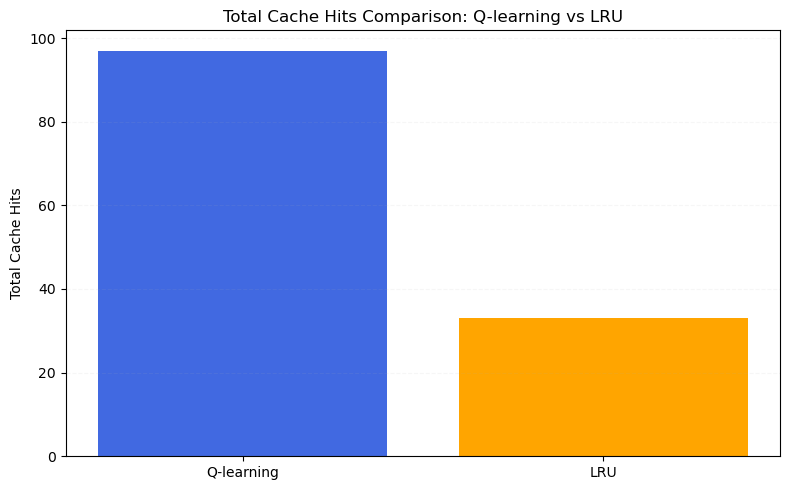

In [7]:
from collections import OrderedDict, Counter

def simulate_lru(request_sequence, cache_size):
    cache = OrderedDict()
    hits = 0
    for content in request_sequence:
        if content in cache:
            hits += 1
            cache.move_to_end(content)
        else:
            if len(cache) >= cache_size:
                cache.popitem(last=False)
            cache[content] = True
    return hits




np.random.seed(42)
request_sequence = []
for _ in range(200):
    request_sequence.extend(cache_content())  


class RequestDrivenFogCachingEnv(FogCachingEnv):
    def __init__(self, content_ids, cache_size, request_sequence):
        super().__init__(content_ids, cache_size)
        self.request_sequence = request_sequence
        self.current_step = 0

    def reset(self):
        self.cache = set()
        self.current_step = 0
        return frozenset(self.cache)

    def step(self, action=None):
        if self.current_step >= len(self.request_sequence):
            return frozenset(self.cache), 0, True  # End
        requested = self.request_sequence[self.current_step]
        self.current_step += 1
        reward = 1 if requested in self.cache else -1
        self.cache.add(requested)
        if len(self.cache) > self.cache_size:
            self.cache.remove(random.choice(list(self.cache)))
        return frozenset(self.cache), reward, False

def train_q_learning_hits(env, episodes=1):
    q_table = defaultdict(float)
    content_ids = env.content_ids
    total_hits = 0
    
    for _ in range(episodes):
        state = env.reset()
        done = False
        while not done:
           
            q_values = {a: q_table[(state, a)] for a in content_ids}
            action = max(q_values, key=q_values.get) if q_values else random.choice(content_ids)
            next_state, reward, done = env.step(action)
            next_max_q = max((q_table[(next_state, a)] for a in content_ids), default=0)
            q_table[(state, action)] += 0.1 * (reward + 0.9 * next_max_q - q_table[(state, action)])
            state = next_state
            if reward == 1:
                total_hits += 1
    return total_hits


cache_size = 5
lru_hits = simulate_lru(request_sequence, cache_size)

env = RequestDrivenFogCachingEnv(content_ids=list(set(request_sequence)), cache_size=cache_size, request_sequence=request_sequence)
q_hits = train_q_learning_hits(env)


labels = ['Q-learning', 'LRU']
hits = [q_hits, lru_hits]

plt.figure(figsize=(8, 5))
plt.bar(labels, hits, color=['royalblue', 'orange'])
plt.title('Total Cache Hits Comparison: Q-learning vs LRU')
plt.ylabel('Total Cache Hits')
plt.grid(axis='y', linestyle='--', alpha=0.1)
plt.tight_layout()
plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Round 1 - Avg Loss: 2908943758131.2002
Round 2 - Avg Loss: 23424366916530552625430528.0000
Round 3 - Avg Loss: inf
Round 4 - Avg Loss: inf
Round 5 - Avg Loss: inf
Round 6 - Avg Loss: inf
Round 7 - Avg Loss: nan
Round 8 - Avg Loss: nan
Round 9 - Avg Loss: nan
Round 10 - Avg Loss: nan


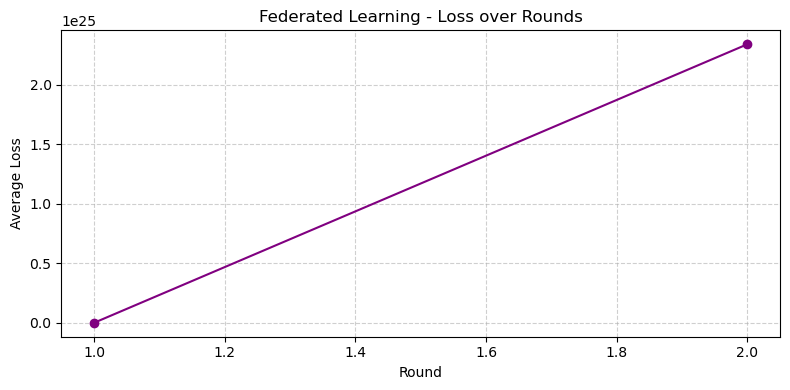

FLRModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [16]:
def simulate_federated_learning_with_plot(data, k_clusters=5, rounds=10):
  
    
    coords = data[['Latitude', 'Longitude']].dropna().values
    
    
    clusters = KMeans(n_clusters=k_clusters, random_state=42).fit_predict(coords)
    clustered_data = [coords[clusters == i] for i in range(k_clusters)]
    
  
    global_model = FLRModel(input_size=2, output_size=1)
    loss_fn = nn.MSELoss()
    loss_over_rounds = []
    
 
    for r in range(rounds):
        local_params = []
        round_losses = []
        
        
        for c_data in clustered_data:
            
            if len(c_data) == 0:
                continue
                
          
            local_model = FLRModel(input_size=2, output_size=1)
            local_model.load_state_dict(global_model.state_dict())
            optimizer = optim.SGD(local_model.parameters(), lr=0.01)
          
            inputs = torch.tensor(c_data, dtype=torch.float32)
            labels = torch.tensor(c_data[:, 0], dtype=torch.float32).unsqueeze(1)
            
           
            for _ in range(3): 
                optimizer.zero_grad()
                outputs = local_model(inputs)
                loss = loss_fn(outputs, labels)
                loss.backward()
                optimizer.step()
            
           
            round_losses.append(loss.item())
            local_params.append({k: v.clone() for k, v in local_model.state_dict().items()})
        
       
        if local_params:
            new_state = global_model.state_dict()
            for key in new_state:
                new_state[key] = torch.stack([p[key] for p in local_params]).mean(0)
            global_model.load_state_dict(new_state)
            
           
            avg_loss = np.mean(round_losses)
            loss_over_rounds.append(avg_loss)
            print(f"Round {r + 1} - Avg Loss: {avg_loss:.4f}")
        else:
            print(f"Round {r + 1} - No valid clusters with data")
            loss_over_rounds.append(float('nan'))
    
   
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, rounds + 1), loss_over_rounds, marker='o', color='purple')
    plt.title("Federated Learning - Loss over Rounds")
    plt.xlabel("Round")
    plt.ylabel("Average Loss")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    
    return global_model
simulate_federated_learning_with_plot(df, k_clusters=5, rounds=10)

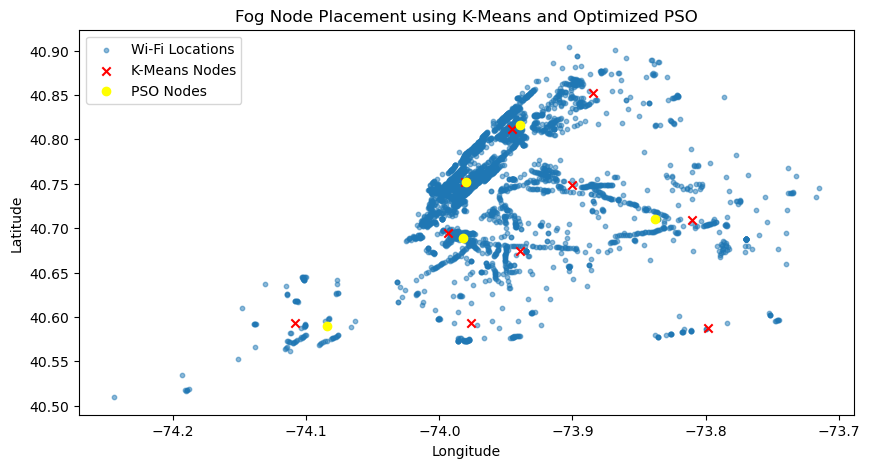

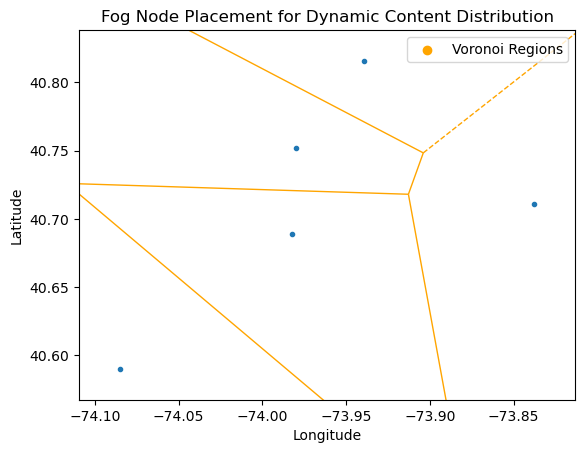

Optimized Fog Node Locations: [[ 40.75218519 -73.97981822]
 [ 40.71058068 -73.83794332]
 [ 40.68906633 -73.9822789 ]
 [ 40.81560677 -73.93912397]
 [ 40.59005666 -74.08471655]]
Cached Content IDs: [21 20 13  6  1 76  9 48 83  5 17  2  3 37 34  4 25 12  8 23]


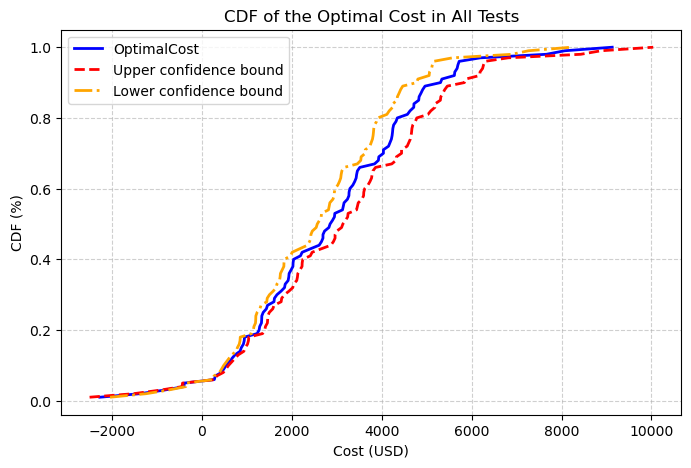

In [11]:
def plot_voronoi(fog_nodes):
    vor = Voronoi(fog_nodes[:, [1, 0]])
    voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=1, alpha=0.5)
    plt.scatter([],[], color='orange',label='Voronoi Regions')


plt.figure(figsize=(10, 5))
plt.scatter(coordinates[:, 1], coordinates[:, 0], s=10, label='Wi-Fi Locations', alpha=0.5)
plt.scatter(fog_nodes_kmeans[:, 1], fog_nodes_kmeans[:, 0], color='red', marker='x', label='K-Means Nodes')
plt.scatter(opt_fog_nodes[:, 1], opt_fog_nodes[:, 0], color='yellow', marker='o', label='PSO Nodes')
plt.legend()
plt.title("Fog Node Placement using K-Means and Optimized PSO")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
plot_voronoi(opt_fog_nodes)
plt.legend()
plt.title("Fog Node Placement for Dynamic Content Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


print("Optimized Fog Node Locations:", opt_fog_nodes)
print("Cached Content IDs:", cached_content)


num_tests = 100
cost_values = np.random.normal(distribution_cost, scale=2000, size=num_tests)
sorted_costs = np.sort(cost_values)
cdf_values = np.arange(1, num_tests + 1) / num_tests
upper_confidence = sorted_costs * 1.1
lower_confidence = sorted_costs * 0.9

plt.figure(figsize=(8, 5))
plt.plot(sorted_costs, cdf_values, label="OptimalCost", color='blue', linewidth=2)
plt.plot(upper_confidence, cdf_values, label="Upper confidence bound", linestyle='--', color='red', linewidth=2)
plt.plot(lower_confidence, cdf_values, label="Lower confidence bound", linestyle='-.', color='orange', linewidth=2)

plt.xlabel("Cost (USD)")
plt.ylabel("CDF (%)")
plt.title("CDF of the Optimal Cost in All Tests")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Mean Relative Cost:
PSO: 0.3600
Greedy Performance-based: 0.3993
Greedy Fog Node Selection: 0.4412
Greedy Request-based: 0.4218
Randomized Request-based: 0.4738


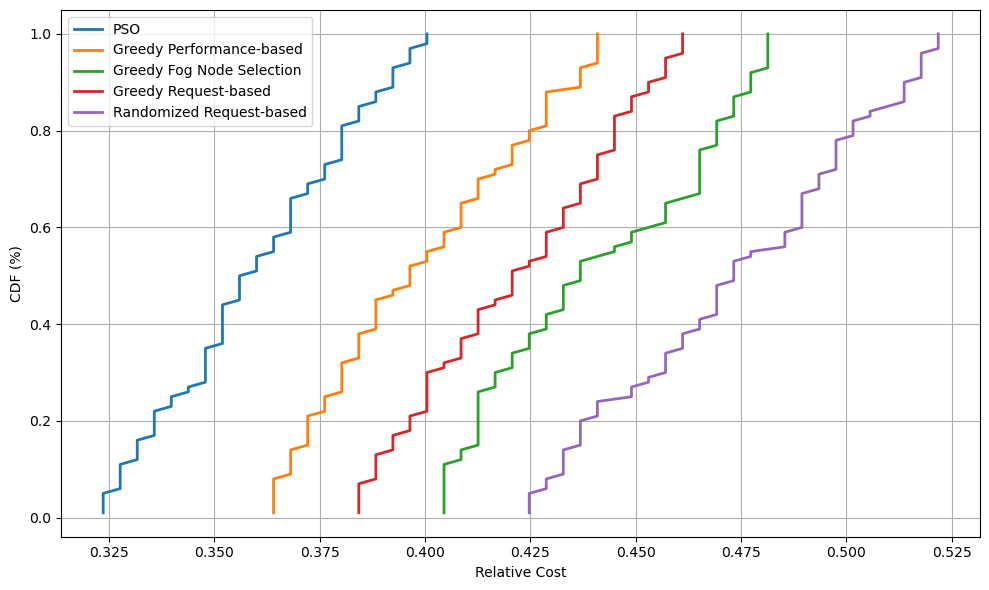

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
STORAGE_COST_PER_GB = 0.15
EGRESS_COST_PER_GB = 0.081
INGRESS_COST_PER_GB = 0.01
FOG_NODE_STORAGE_TB = 12
FOG_NODE_STORAGE_GB = FOG_NODE_STORAGE_TB * 1024
REPLICA_SIZE_MB = 200
REPLICA_SIZE_GB = REPLICA_SIZE_MB / 1024
UPDATE_FREQUENCY = 0.2

# Fixed Optimal Cost (Reference)
optimal_cost = 29.74

# Cost Calculation Function
def calculate_cost(num_replicas, egress_per_replica=1.0, ingress_per_replica=1.0):
    storage_cost = num_replicas * REPLICA_SIZE_GB * STORAGE_COST_PER_GB
    egress_cost = num_replicas * egress_per_replica * EGRESS_COST_PER_GB
    ingress_cost = num_replicas * ingress_per_replica * INGRESS_COST_PER_GB
    total_cost = storage_cost + egress_cost + ingress_cost
    return total_cost

# Simulated data
np.random.seed(42)
num_simulations = 100

# Simulated replicas per algorithm
pso_replicas = np.random.randint(80, 100, num_simulations)
greedy_perf_replicas = np.random.randint(90, 110, num_simulations)
greedy_fog_replicas = np.random.randint(100, 120, num_simulations)
greedy_req_replicas = np.random.randint(95, 115, num_simulations)
random_req_replicas = np.random.randint(105, 130, num_simulations)

# Calculate relative cost to the optimal cost
pso_rel = np.array([calculate_cost(r) / optimal_cost for r in pso_replicas])
greedy_perf_rel = np.array([calculate_cost(r) / optimal_cost for r in greedy_perf_replicas])
greedy_fog_rel = np.array([calculate_cost(r) / optimal_cost for r in greedy_fog_replicas])
greedy_req_rel = np.array([calculate_cost(r) / optimal_cost for r in greedy_req_replicas])
random_req_rel = np.array([calculate_cost(r) / optimal_cost for r in random_req_replicas])

# CDF computation function
def compute_cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

print("Mean Relative Cost:")
print(f"PSO: {np.mean(pso_rel):.4f}")
print(f"Greedy Performance-based: {np.mean(greedy_perf_rel):.4f}")
print(f"Greedy Fog Node Selection: {np.mean(greedy_fog_rel):.4f}")
print(f"Greedy Request-based: {np.mean(greedy_req_rel):.4f}")
print(f"Randomized Request-based: {np.mean(random_req_rel):.4f}")
# Compute CDFs for each algorithm
x_pso, y_pso = compute_cdf(pso_rel)
x_gp, y_gp = compute_cdf(greedy_perf_rel)
x_gf, y_gf = compute_cdf(greedy_fog_rel)
x_gr, y_gr = compute_cdf(greedy_req_rel)
x_rr, y_rr = compute_cdf(random_req_rel)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_pso, y_pso, label="PSO", linewidth=2)
plt.plot(x_gp, y_gp, label="Greedy Performance-based", linewidth=2)
plt.plot(x_gf, y_gf, label="Greedy Fog Node Selection", linewidth=2)
plt.plot(x_gr, y_gr, label="Greedy Request-based", linewidth=2)
plt.plot(x_rr, y_rr, label="Randomized Request-based", linewidth=2)


plt.xlabel("Relative Cost")
plt.ylabel("CDF (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
